In [2]:
#Necessary Imports
import os
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf

import keras

from tensorflow import keras
from tensorflow.keras import layers

import nibabel as nib

from scipy import ndimage

In [3]:
#Functions
def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    #print(scan)
    
    # Get raw data
    scan = scan.get_fdata()
#     show_slices([scan[100, :, :],
#              scan[:, 120, :],
#              scan[:, :, 100]])
#     print(np.min(scan))
#     print(np.max(scan))
#     print(scan.shape)
    return scan


def normalize(volume):
    """Normalize the volume"""
#     min = -1000
#     max = 400
#     volume[volume < min] = min
#     volume[volume > max] = max
#     volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
#     print(volume)
    return volume


def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 64
    desired_width = 128
    desired_height = 128
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
#     print(img)
#     print(np.min(img))
#     print(np.max(img))
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    return volume


In [4]:
dt = pd.read_csv("Dataset\metaData.csv")
type1=[]
type2=[]
type3=[]
type4=[]
type5=[]
for i in range(len(dt.head(500))):
    if (dt.iloc[i]['TypeOfTB']==1):
        type1.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==2):
        type2.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==3):
        type3.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==4):
        type4.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==5):
        type5.append(dt.iloc[i]['FileName'])
print(type3)
print(len(type3))


['TRN_0077.nii.gz']
1


In [5]:
i=0
type2paths=[]
type1paths=[]
type3paths=[]
type4paths=[]
type5paths=[]


for i in range(len(type1)):
    temptype1="Dataset\\Train\\"+type1[i]
    type1paths.append(temptype1)
for i in range(len(type2)):
    temptype2="Dataset\\Train\\"+type2[i]
    type2paths.append(temptype2)
for i in range(len(type3)):
    temptype3="Dataset\\Train\\"+type3[i]
    type3paths.append(temptype3)
for i in range(len(type4)):
    temptype4="Dataset\\Train\\"+type4[i]
    type4paths.append(temptype4)
for i in range(len(type5)):
    temptype5="Dataset\\Train\\"+type5[i]
    type5paths.append(temptype5)

print(type2paths)

['Dataset\\Train\\TRN_0017.nii.gz', 'Dataset\\Train\\TRN_0028.nii.gz', 'Dataset\\Train\\TRN_0038.nii.gz', 'Dataset\\Train\\TRN_0050.nii.gz', 'Dataset\\Train\\TRN_0070.nii.gz', 'Dataset\\Train\\TRN_0088.nii.gz', 'Dataset\\Train\\TRN_0091.nii.gz', 'Dataset\\Train\\TRN_0092.nii.gz', 'Dataset\\Train\\TRN_0094.nii.gz']


In [6]:
#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_one_scans=np.array([process_scan(path) for path in type1paths])
  
# #path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_two_scans=np.array([process_scan(path) for path in type2paths])
 
#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_three_scans=np.array([process_scan(path) for path in type3paths])

# #path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_four_scans=np.array([process_scan(path) for path in type4paths])
   
# #path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_five_scans=np.array([process_scan(path) for path in type5paths])
        

In [25]:
type_one = round(0.7 * len(type_one_scans))
type_two = round(0.7 * len(type_two_scans))
type_three = round(0.7 * len(type_three_scans))
type_four = round(0.7 * len(type_four_scans))
type_five = round(0.7 * len(type_five_scans))
print(type_four)

8


In [8]:
type_one_labels = np.array([0 for _ in range(len(type_one_scans))])
type_two_labels = np.array([1 for _ in range(len(type_two_scans))])
type_three_labels = np.array([2 for _ in range(len(type_three_scans))])
type_four_labels = np.array([3 for _ in range(len(type_four_scans))])
type_five_labels = np.array([4 for _ in range(len(type_five_scans))])

# #Split data for training and validation into 70-30.
x_train = np.concatenate((type_one_scans[:type_one], type_two_scans[:type_two],type_three_scans[:1], type_four_scans[:type_four],type_five_scans[:type_five]) , axis = 0)
y_train = np.concatenate((type_one_labels[:type_one], type_two_labels[:type_two],type_three_labels[:1], type_four_labels[:type_four],type_five_labels[:type_five]), axis = 0)


x_val =np.concatenate((type_one_scans[type_one:], type_two_scans[type_two:],type_three_scans[type_three:], type_four_scans[type_four:],type_five_scans[type_five:]) , axis = 0)
y_val = np.concatenate((type_one_labels[type_one:], type_two_labels[type_two:],type_three_labels[type_three:], type_four_labels[type_four:],type_five_labels[type_five:]), axis = 0)


print(
    "Number of samples in train and validation are %d and %d."
    % (x_train.shape[0], x_val.shape[0])
)
#print(len(x_train))
#print(len(y_train))
print(x_train)
print(np.min(x_train))
print(np.max(x_train))
#print(y_train)

Number of samples in train and validation are 70 and 31.
[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]


In [9]:
import random

from scipy import ndimage


@tf.function
def rotate(volume):
    """Rotate the volume by a few degrees"""

    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume


def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


#### Augmentation

In [10]:
# Define data loaders.
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

batch_size = 2
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(x_train))
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)

# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(x_val))
    .map(validation_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)
print(train_dataset)
print(len(validation_loader))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
<PrefetchDataset shapes: (<unknown>, (None,)), types: (tf.float32, tf.int32)>
31


Dimension of the CT scan 1 is: (512, 512, 132)


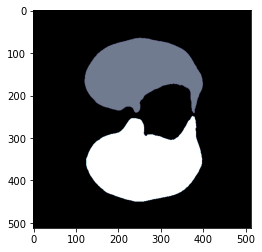

In [18]:
import matplotlib.pyplot as plt

# #for i in range (1,5):
# data = train_dataset.take(1)
# images, labels = list(data)[0]
# images = images.numpy()
# image = images[0]


image = nib.load("Dataset/Train/TRN_0007.nii.gz")
image = image.get_fdata()

print("Dimension of the CT scan",1,"is:", image.shape)
plt.imshow(np.squeeze(image[:, :, 63]),cmap=plt.cm.bone)



In [ ]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


# Visualize montage of slices.
# 4 rows and 10 columns for 100 slices of the CT scan.
plot_slices(4, 10, 128, 128, image[:, :, :40])


In [ ]:
!pip install keras_sequential_ascii

In [14]:
def get_model(width=128, height=128, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="softmax")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="softmax")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=1, activation="softmax")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model

# Build model.
model = get_model(width=128, height=128, depth=64)
model.summary()


Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 64, 1)] 0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 126, 126, 62, 64)  1792      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 63, 63, 31, 64)    0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 63, 63, 31, 64)    256       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 61, 61, 29, 64)    110656    
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 30, 30, 14, 64)    0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 14, 64)    256   

In [14]:
def get_model(width=128, height=128, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=32, kernel_size=3, activation="relu", kernel_initializer='he_uniform')(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization(center=True, scale=True)(x)
    x = layers.Dropout(0.5)(x)


    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu", kernel_initializer='he_uniform')(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization(center=True, scale=True)(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu', kernel_initializer='he_uniform')(x)
    x = layers.Dense(256, activation='relu', kernel_initializer='he_uniform')(x)

    outputs = layers.Dense(units=1, activation="softmax")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model

# Build model.
model = get_model(width=128, height=128, depth=64)
model.summary()


Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 64, 1)] 0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 126, 126, 62, 32)  896       
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 63, 63, 31, 32)    0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 63, 63, 31, 32)    128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 63, 63, 31, 32)    0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 61, 61, 29, 64)    55360     
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 30, 30, 14, 64)    0     

In [15]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)

# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "Dataset/3d_image_classification.h5", save_best_only=True
)

early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)



In [16]:
# Train the model, doing validation at the end of each epoch
epochs = 20
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=1,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/2
35/35 [==============================] - 982s 28s/step - loss: 0.0000e+00 - acc: 0.0857 - val_loss: 0.0000e+00 - val_acc: 0.0968
Epoch 2/2
35/35 [==============================] - 926s 26s/step - loss: 0.0000e+00 - acc: 0.0857 - val_loss: 0.0000e+00 - val_acc: 0.0968


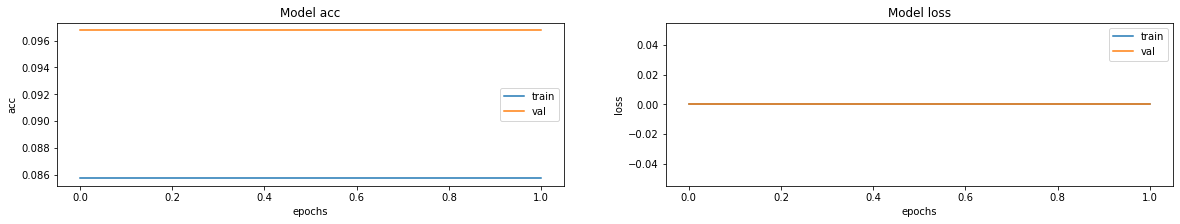

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])


In [20]:
# Load best weights.

model.load_weights("Dataset/3d_image_classification.h5")

for i in range(len(x_val)):
    
    prediction = model.predict(np.expand_dims(x_val[i], axis=0))
    #print(y_val[i])
    scores = prediction
    class_names=str(y_val[i])


    for score, name in zip(scores, class_names):
        print(score)
        print(
            "This model is %.2f percent confident that CT scan is %s"
            % ((100 * score), name)
        )

[1.]
This model is 100.00 percent confident that CT scan is 0
[1.]
This model is 100.00 percent confident that CT scan is 0
[1.]
This model is 100.00 percent confident that CT scan is 0
[1.]
This model is 100.00 percent confident that CT scan is 0


KeyboardInterrupt: 

In [ ]:
model.load_weights("3d_image_classification.h5")

prediction = model.predict(np.expand_dims(x_val[2], axis=0))[0]
scores = [1 - prediction[0], prediction[0]]

class_names = ["1", "2", "3", "4", "5"]
for score, name in zip(scores, class_names):
    print(score)
    print(
        "This model is %.2f percent confident that CT scan is %s"
        % ((100 * score), name)
    )